<type 'numpy.ndarray'>


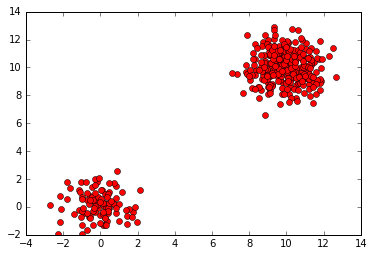

In [4]:
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline  

obs = np.concatenate((np.random.randn(100, 2), 10 + np.random.randn(300, 2)))
print type(obs)
plt.plot(obs[:,0], obs[:,1], 'ro')
plt.show()

In [5]:
gmm = mixture.GMM(n_components=2, n_iter = 100)
gmm.fit(obs) 
print gmm
print np.round(gmm.weights_,2)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  tol=0.001, verbose=0)
[ 0.75  0.25]


2500 2500
(2500, 2) (2500,)
[[ -20.71150105  -19.24832005  -17.92978097 ...,  -87.4278627   -88.67231765
   -90.04774583]
 [ -19.12167884  -17.65849783  -16.33995875 ...,  -83.29580407
   -84.54025902  -85.9156872 ]
 [ -17.67878994  -16.21560893  -14.89706985 ...,  -79.27347786
   -80.51793281  -81.89336099]
 ..., 
 [-101.06667305  -96.17823114  -91.39865312 ...,  -11.84185783
   -13.08631278  -14.46174096]
 [-102.11531559  -97.20434544  -92.42404194 ...,  -12.86722315  -14.1116781
   -15.48710628]
 [-103.25073608  -98.33945345  -93.55914    ...,  -14.00232089
   -15.24677584  -16.62220402]]


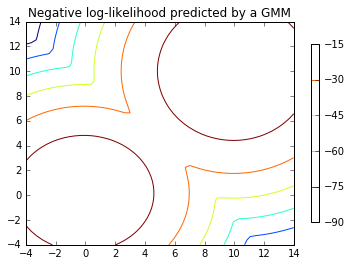

In [35]:
from matplotlib.colors import LogNorm
# display predicted scores by the model as a contour plot
x = np.linspace(-4.0, 14.0)
y = np.linspace(-4.0, 14.0)
X, Y = np.meshgrid(x, y)
print X.size, Y.size
XX = np.array([X.ravel(), Y.ravel()]).T

prob = gmm.score(XX)

print XX.shape, prob.shape

prob = prob.reshape((50, 50));

print prob

CS = plt.contour(X, Y, prob);
                 
CB = plt.colorbar(CS, shrink=0.8, extend='both')
# plt.scatter(obs[:, 0], obs[:, 1], .8);


# Z = -gmm.score_samples(XX)[0]
# Z = Z.reshape(X.shape)

# CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
#                  levels=np.logspace(0, 3, 10))
# CB = plt.colorbar(CS, shrink=0.8, extend='both')
# plt.scatter(obs[:, 0], obs[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

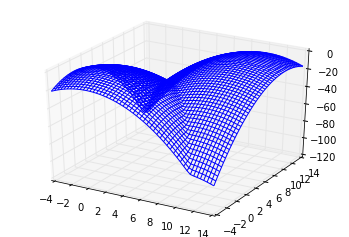

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Z= -Z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, prob)
plt.show()